In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from utils import *
from fbprophet import Prophet
sns.set()

In [6]:
from sklearn.linear_model import BayesianRidge

df_1,df_2,testdf = read_data()

ts1,mindate1,maxdate1=format_ts(df_1,'case_count',make_test_pred=1)
ts2,mindate2,maxdate2=format_ts(df_2,'case_count',make_test_pred=1)

Time period given:  2017-04-01 00:00:00 2019-07-05 00:00:00
Time period used for training:  2017-04-01 2019-07-05
Time period given:  2017-04-01 00:00:00 2019-07-23 00:00:00
Time period used for training:  2017-04-01 2019-07-23


In [32]:
ts_1=pd.DataFrame()
ts_1['ds']=ts1.index
ts_1['y']=ts1['y'].values
ts_1=ts_1[['ds','y']]
ts_1.head()

ts_2=pd.DataFrame()
ts_2['ds']=ts2.index
ts_2['y']=ts2['y'].values
ts_2=ts_2[['ds','y']]
ts_2.head()

,ds,y
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0


In [45]:
def fit_prophet(train,fo):
        model = Prophet(yearly_seasonality=False)
        #model = Prophet(yearly_seasonality=20) 
        #model = Prophet(seasonality_mode='multiplicative')    
        #model = Prophet(holidays=holidays, holidays_prior_scale=0.05, seasonality_mode='multiplicative')
        model.add_seasonality(name='monthly', period=30.5, fourier_order=fo)
        model.add_country_holidays(country_name='IN') # Adding indian holidays
        model.fit(train) #fit the model with our dataframe

        # predict for 3 months in the furure, and D - daily is the frequency
        future = model.make_future_dataframe(periods = 1, freq = 'D')

        # now lets make the forecasts
        forecast = model.predict(future)
        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
        return model,forecast


#custom backtest function
def backtest(myts,n_days,fo=5):
    """
    n_days - amount of the last n_days that we whant to get prediction and calculate metrics
    """
    predictions = []
    true_values = []
    for i in reversed(range(1, n_days)):
        train = myts[:len(myts)-i]
        test = myts[len(myts)-i:len(myts)-i+1]
        fo_list=[]
        mape_list=[]
        model,forecast=fit_prophet(train,fo)
        #model.plot(forecast)
        predictions.append(forecast['yhat'].values[0])
        true_values.append(test.y.values[0])
    return true_values, predictions

def plot_results(myts,n_days):
    plt.plot(myts[:len(myts)-n_days].index, myts[:len(myts)-n_days].y, color='b',label='train')
    plt.plot(myts[len(myts)-n_days:].index, myts[len(myts)-n_days:].y, color='g',label='test')
    plt.plot(myts[len(myts)-n_days+1:].index,predictions, color='orange',label='forecast')
    plt.title("3 month Applications forecast")
    plt.show()

In [37]:
# Backtesting for segment 1

fo_list=[]
mape_list=[]
for fo in [14,15,16,17,18,19,20]:
    true_values, predictions = backtest(ts_1,91,fo)
    fo_list.append(fo)
    mape_list.append(forecast_accuracy(np.array(predictions), np.array(true_values))['mape'])
mape_df =  pd.DataFrame({'fo': fo_list,'mape': mape_list})
mape_df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays fro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

,fo,mape
0,14,1.647906
1,15,1.632546
2,16,1.585833
3,17,1.577902
4,18,1.551348
5,19,1.523660
6,20,1.479300


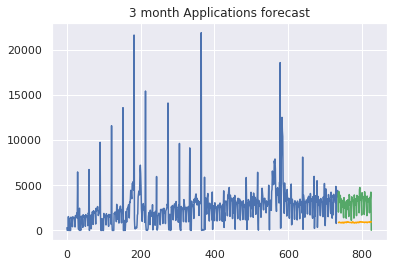

In [46]:
plot_results(ts_1,91)

In [36]:
# Backtesting for segment 1

fo_list=[]
mape_list=[]
for fo in [5,6,7,8,9,10,11]:
    true_values, predictions = backtest(ts_2,91,fo)
    fo_list.append(fo)
    mape_list.append(forecast_accuracy(np.array(predictions), np.array(true_values))['mape'])
mape_df =  pd.DataFrame({'fo': fo_list,'mape': mape_list})
mape_df

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays fro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwali and Holi holidays from 2010 to 2025

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/divyansh/anaconda3/envs/tfgpu/lib/python3.6/site-packages/fbprophet/hdays.py:256: Warning:

We only support Diwa

,fo,mape
0,5,1.655840
1,6,1.555523
2,7,1.542968
3,8,1.548790
4,9,1.543573
5,10,1.547322
6,11,1.556681


In [ ]:
plot_results(ts_2,91)